In [1]:
import pickle
import numpy as np
from sklearn import preprocessing    # Use for standardizing feature value
from sklearn.neighbors import KNeighborsRegressor # Use for Q2
import matplotlib.pylab as plt    # Use for Q2

# Load data
Load the msd_data1.pickle data from from msd_data1.pickle using pickle.load().

Please make sure that msd_data1.pickle should be placed in the same folder.

In [2]:
data = {}
file = open("msd_data1.pickle","rb")
data = pickle.load(file)

X_train = data['X_train']
Y_train = data['Y_train']
X_test = data['X_test']
Y_test = data['Y_test']
training_point_count = X_train.shape[0]
testing_point_count = X_test.shape[0]

# Preprocessing data
Standardized all feature values so that all features have a zero mean and a unit variance.

In [4]:
# Scaled data has zero mean and unit variance
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

# Q1: myknn_regressor

## Q1.1 
Create your myknn_regressor.

In [5]:
class myknn_regressor():
    
    def __init__(self, k_value, f_function):
        self.k_value = k_value
        self.f_function = f_function

    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        self.training_point_count = X_train.shape[0]
    
    def predict(self, X_test):
        testing_point_count =  X_test.shape[0]
        Y_predict = []
        
        for x_test_num in range(testing_point_count):
            x_test_n_dist_dict = {}
            for i in range(self.training_point_count):
                dist = np.linalg.norm(self.X_train[i] - X_test[x_test_num])
                x_test_n_dist_dict[i] = dist
            
            # sort the dist_dict by value
            x_test_n_dist_dict = dict(sorted(x_test_n_dist_dict.items(), key=lambda x: x[1]))
            k_items = dict(list(x_test_n_dist_dict.items())[:self.k_value])
            k_keys = list(k_items.keys())
            
            # remove outliers
            no_outlier_num = []
            k_items_y = self.Y_train[k_keys]     #存最近k個點的Y_train值
            if self.f_function == 'remove_outliers':
                Q1 = np.quantile(k_items_y, .25)
                Q3 = np.quantile(k_items_y, .75)
                IQR = Q3-Q1
                for y_num in k_keys:
                    if Y_train[y_num] <= (Q3 + (1.5*IQR)) and Y_train[y_num] >= (Q1-(1.5*IQR)):
                        no_outlier_num.append(y_num)
                k_items_y = Y_train[no_outlier_num]
            
            # 計算 predict 出來的 Y值
            sum_train_y = 0
            for y_value in k_items_y:
                sum_train_y += y_value
            average_y = sum_train_y / k_items_y.shape[0]
            Y_predict.append(average_y)
            
        Y_predict = np.array(Y_predict)
        return Y_predict

## Q1.2 
Load data from msd_data1.pickle. You should standardized all feature values so that all features have a zero mean and a unit variance before training a KNN model. Make predictions using  𝑘=20 and "equal_weight" 𝑓. List the RMSE and the first 20 predictions in the testing data.

In [6]:
myknn = myknn_regressor(20, 'equal_weight')
myknn.fit(X_train_scaled, Y_train)
ypred = myknn.predict(X_test_scaled)

In [7]:
# list the RMSE
rmse = np.linalg.norm(Y_test - ypred) / (testing_point_count** 0.5)
print(rmse)

# list the first 20 predictions in the testing data
print(ypred[:19])

10.292158827638314
[1992.9  1994.05 2000.05 1991.5  1992.8  1998.5  1987.1  1990.9  2001.8
 2003.   2001.15 1998.65 1995.55 1997.2  1995.05 1997.35 1992.15 1999.1
 2003.6 ]


## Q1.3
Load data from msd_data1.pickle. Standardized all feature values so that all features have a zero mean and unit variance. Make predictions using  𝑘=20 and "remove_outier" 𝑓. List the RMSE and the first 20 predictions in the testing data.

In [9]:
no_outliers_myknn = myknn_regressor(20, 'remove_outliers')
no_outliers_myknn.fit(X_train_scaled, Y_train)
no_outliers_ypred = no_outliers_myknn.predict(X_test_scaled)

In [10]:
# list the RMSE
no_outliers_rmse = np.linalg.norm(Y_test - no_outliers_ypred) / (no_outliers_ypred.shape[0]**0.5)
print(no_outliers_rmse)

# list the first 20 predictions in the testing data
print(no_outliers_ypred[:19])

10.225720983625129
[1992.9        1994.05       2000.05       1992.73684211 1992.8
 2000.         1987.1        1990.9        2001.8        2003.94736842
 2001.15       2000.94444444 1995.55       1997.2        1998.61111111
 1997.35       1992.15       2004.23529412 2003.6       ]


# Q2: Tuning the Hyper-parameter
We are going to explore the issue of hyper-parameter tuning in this question. We are going to consider three cases in this question. Use the knn regressor from klearn.neighbors.KNeighborsRegressor for the first two cases, and your own myknn_regressor for the third cases.

For each case, plot a curve that shows the relations between  𝑘 (x-axis) and RMSE (y-axis). If possible, plot the three curves in the same figure so that we can visually inspect their dynamics. Discuss your observations.

In [11]:
k_list = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]

## Case 1
In the first case, all feature values are standardize to have unit variances and zero means.

In [12]:
case1_rmse_dict = {}    # key = k, value = rmse
for k in k_list:
    case1_knn = KNeighborsRegressor(n_neighbors=k)
    case1_knn.fit(X_train_scaled, Y_train)
    case1_knn_ypred = case1_knn.predict(X_test_scaled)
    case1_knn_rmse = np.linalg.norm(Y_test - case1_knn_ypred) / (testing_point_count** 0.5)
    case1_rmse_dict[k] = case1_knn_rmse

In [13]:
case1_rmse_dict_list = sorted(case1_rmse_dict.items()) # sorted by key, return a list of tuples
case1_x, case1_y = zip(*case1_rmse_dict_list) # unpack a list of pairs into two tuples


## Case 2
For the second case, do not apply feature scaling

In [14]:
case2_rmse_dict = {}    # key = k, value = rmse
for k in k_list:
    case2_knn = KNeighborsRegressor(n_neighbors=k)
    case2_knn.fit(X_train, Y_train)
    case2_knn_ypred = case2_knn.predict(X_test)
    case2_knn_rmse = np.linalg.norm(Y_test - case2_knn_ypred) / (testing_point_count** 0.5)
    case2_rmse_dict[k] = case2_knn_rmse

In [15]:
case2_rmse_dict_list = sorted(case2_rmse_dict.items()) # sorted by key, return a list of tuples
case2_x, case2_y = zip(*case2_rmse_dict_list) # unpack a list of pairs into two tuples


## Case 3
The third case use standardized feature and adopted myknn_regressor with "remove_outlier" 𝑓 to make prediction.

In [17]:
case3_rmse_dict = {}    # key = k, value = rmse
for k in k_list:
    case3_knn = myknn_regressor(k, 'remove_outliers')
    case3_knn.fit(X_train_scaled, Y_train)
    
    case3_knn_ypred = case3_knn.predict(X_test_scaled)
    case3_knn_rmse = np.linalg.norm(Y_test - case3_knn_ypred) / (case3_knn_ypred.shape[0]**0.5)
    case3_rmse_dict[k] = case3_knn_rmse

In [18]:
case3_rmse_dict_list = sorted(case3_rmse_dict.items()) # sorted by key, return a list of tuples
case3_x, case3_y = zip(*case3_rmse_dict_list) # unpack a list of pairs into two tuples


## Plot

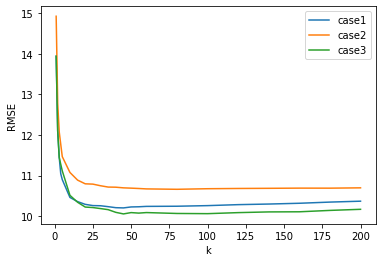

In [19]:
plt.plot(case1_x, case1_y, label = 'case1')
plt.plot(case2_x, case2_y, label = 'case2')
plt.plot(case3_x, case3_y, label = 'case3')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## Discussion

上圖 X 軸為 k 值，Y 軸為 RMSE 值，橘色線為 case 2，藍色線為 case 1，綠色線為 case 3。
從上圖可以觀察到，三個 case 在不同 k 值時 RMSE 的變化趨勢是相同的，當 k 介於 0-15之間時， RMSE 隨著 k 的增加急劇下降，自 25 以後下降逐漸趨緩，而當 k 大於 125 時甚至有微微上升的趨勢。

我們可以透過找 RMSE 的最小值來看哪一個 k 表現最好。
case 2 的表現相較其他兩個 case 最不理想，而 case 3 的表現又略比 case 1 好。可以推估，在 feature 沒有做標準化的情況下，模型預測出來對上實際值的誤差最大，而移除 outliers 後更可以增加模型預測的準確度。